In [1]:
#This notebook is designed to be converted to a HTML slide show
#To do this in the command prompt type (in the folder containing the notebook): 
#       jupyter nbconvert *.ipynb --to slides

# **Compiling Chemical Reaction Networks with BioCRNpyler**
## BE 240 April 23rd 2020
### _William Poole_

**Overview:** In this tutorial, we will introduce reaction schemas and learn how to compile large chemical reaction networks from a set of "parts" using [BioCRNpyler](https://github.com/BuildACell/BioCRNPyler).

# Installing BioCRNpyler

> git clone https://github.com/BuildACell/BioCRNPyler.git

cd (To BioCRNpyler Directory)

> python setup.py install

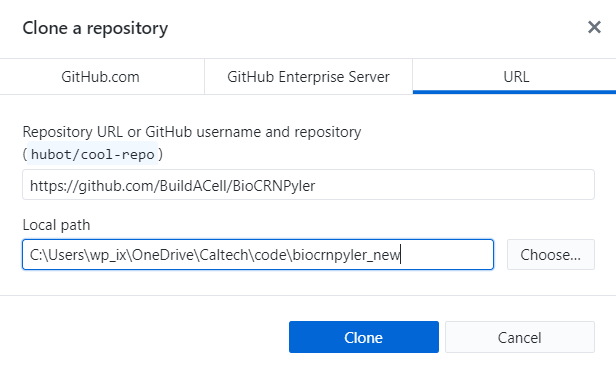



# Chemical Reaction Network Compilers are common in DNA nanotech

__High Level Specifications to Chemical Reaction Networks__
Abstract Specification $\to$ Implementation or Idealized CRN
* [A programming language for composable DNA circuits Andrew Phillips and Luca Cardelli, 2009](https://doi.org/10.1098/rsif.2009.0072.focus)
* [Beal et al. Automatic Compilation from High-Level Biologically-Oriented Programming Language to Genetic Regulatory Networks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3151252/)
* [Cello: Genetic Circuit Design Automation. Neilsen et al. 2016](https://science.sciencemag.org/content/352/6281/aac7341)

__Chemical Reaction Network to Chemical Reaction Network Compilation__
Specification CRN $\to$ Implementation CRN
* [Lulu Qian and Erik Winfree, Scaling Up Digital Circuit Computation with DNA Strand Displacement Cascades 2011](https://science.sciencemag.org/content/332/6034/1196)
* [Lakin et al. Visual DSD: a design and analysis tool for DNA strand displacement systems, 2011](https://academic.oup.com/bioinformatics/article/27/22/3211/195595)


## _BioCRNpyler is Different_

An object oriented framework (written in Python) designed for synthetic and systems biology modelling.
* How do different _Components_ behave in different _Contexts_?
* How do different _Models_ effect predicted biological function?

### BioCRNpyler Represents Component-Component and Component-Environment interactions via exchangable internal models and "guesses" parameters in order to get large models running quickly.

> generates crn for you based on components, <br>
> have overarching thing, can include detail as desired from same description of circuit <br>
> can get a different output each time <br>
> different biochem pathways can be utilized <br>
> have control over what level of resolution <br>


# BioCRNpyler v.s. Bioscrape

## Bioscrape is a CRN Simulator
* Builds CRNs reaction by reaction (python API) or loads CRN from a file (SBML or Bioscrape XML)
* Supports features beyond traditional CRNs (e.g. rules)
* Supports multiple simulation methods (e.g. stochastic, deterministic, cell lineage)

## BioCRNpyler Generates CRNs from Simple Descriptions
* Builds CRN models from high-level descriptions of the pieces and the context
* Models are output as SBML
* Models can be simulated via any simulator (but are optimized for Bioscrape).


## BioCRNpyler Compiles Chemical Reaction Network Models from Simple Descriptions

A __Chemical Reaction Network__ Contains
> chemical_reaction_network.ChemicalReactionNetwork

__Single Species__: (can have material and other attributes)
> chemical_reaction_network.Species

__Complex of Bound Species__: (defined as a grouping of single Species)
> chemical_reaction_network.ComplexSpecies

__Chemical Reactions__: Inputs $\to$ Outputs (with all the same propensity types as bioscrape)

> chemical_reaction_network.Reaction

_Which can be saved as SBML and simulated._
> Machinery to things that should remain constant

## BioCRNpyler Modelling Framework: Mixture = Context, Components = Parts, Mechanism = Reaction Schema

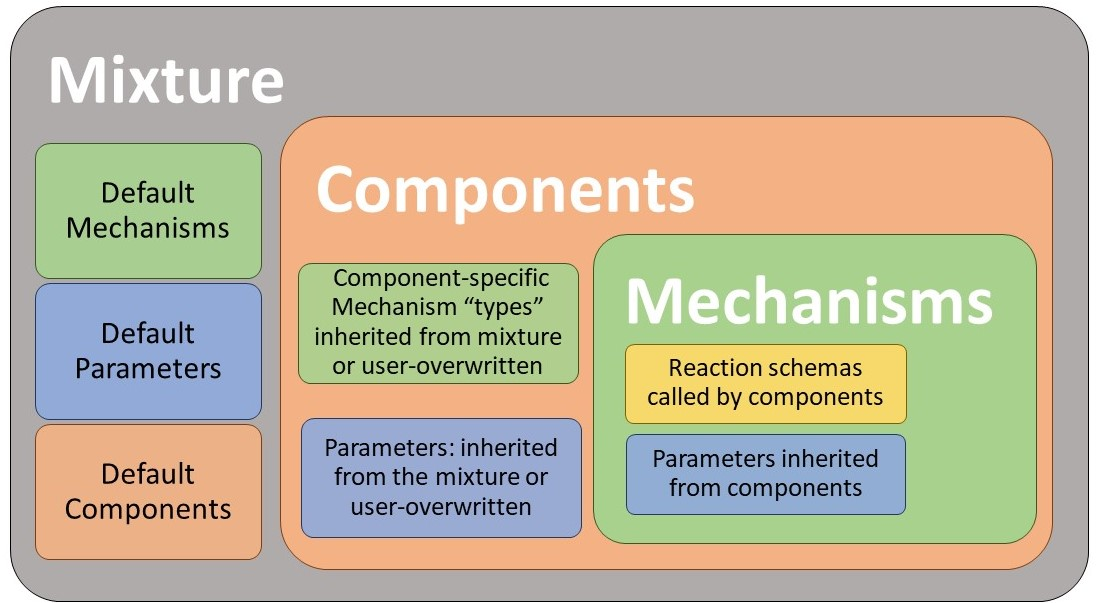

## Example: Context = Cell Extract, Parts = Synthetic Circuit, Schema = TX-TL Model

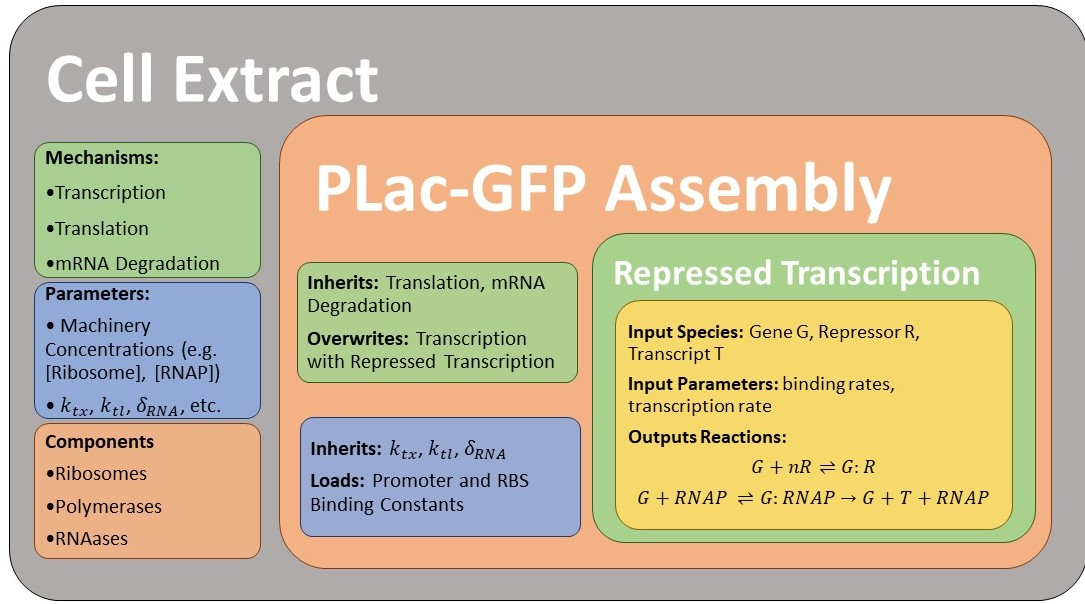

## A Chemical Reaction Network Schema Represents a function: Inputs $\to$ Outputs as a CRN
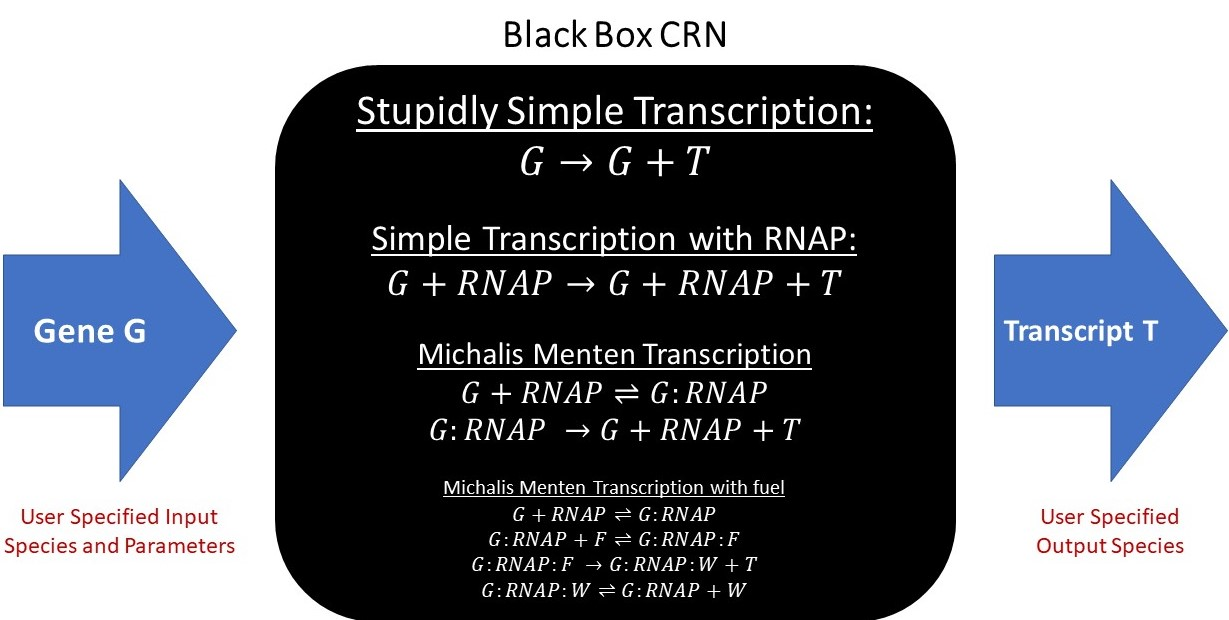

# BioCRNpyler Compilation is Heirarchical

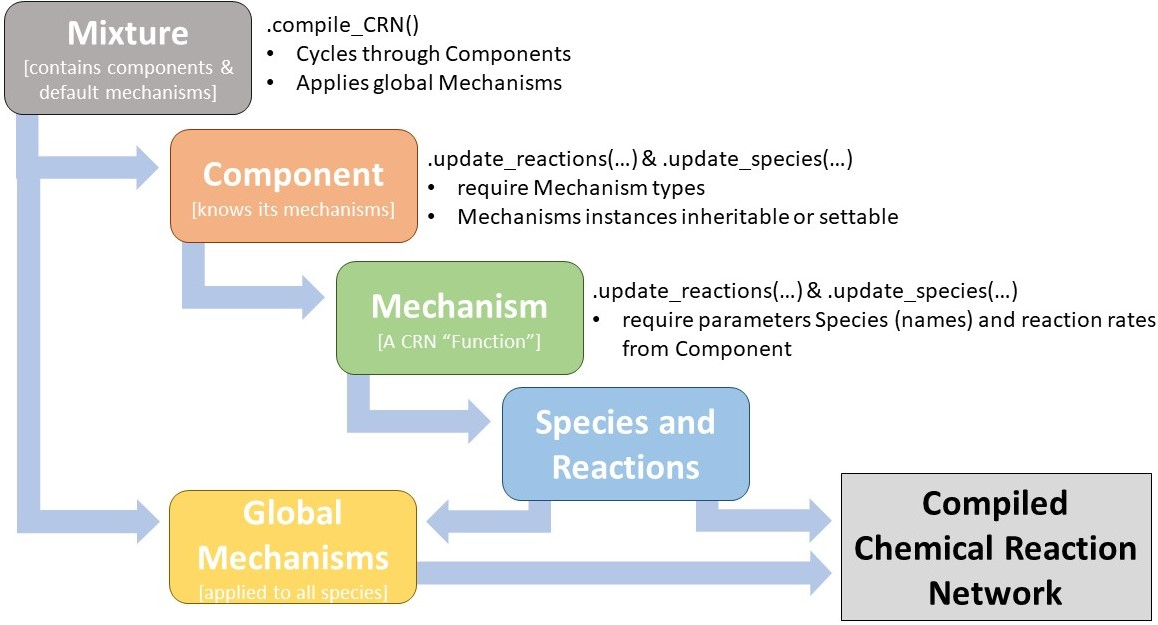


# Existing Mixtures
* __ExpressionExtract__: Models Gene Expression without Transcriptional or Translational Machinery
* __TxTlExtract__: Models Transcription and Translation with Polymerases, Ribosomes, and Endonucleases

_Note: These models can also be used for cellular environments in a pinch_
## We need more Mixtures! For example:
* __Cellular Environments__: What are the major differences between a cellular environment and an extract?
* __Extracts with finite resources (energy molecules)__: How do we model metabolism simply?

## Existing Components:
* __rna__, __dna__, __protein__ are superclasses for different kinds of materials.
* __DNA Assembly__: Super-component for synthetic biology which contains many sub-components:
    - __Promotor__: Are transcribable. Also __Regulated Promotors__ can be activated or repressed.
    - __RBS__: Are translatable.
(see component.py, dna_assembly.py and Examples\Advanced_Examples.ipynb Example 1 & 2)



### A Case Study: dCas9 Transcriptional Regulation:
* __dCas9__ is a __protein__ which binds to __guideRNA__ to produce a  __complex_species__ which can regulates a __Regulated Promoter__
    * both __dCas9__ and the __guideRNA__ must be produced from __DNA Assembly__ objects.
(see Examples\Advanced_Examples.ipynb Example 3)

## Existing Mechanisms:
__Core Motifs:__
* MichalisMentenRXN(S, E, P): $S+E \leftrightarrow S:E \to E+P$
* MichalisMentenCopyRXN(S, E, P): $S+E \leftrightarrow S:E \to E+S+P$
* One_Step_Cooperative_Binding(S1, S2, n): $n \cdot S1 + S2 \leftrightarrow S2:nS1$
* Two_Step_Cooperative_Binding(S1, S2, n): $n \cdot S1 \leftrightarrow nS1 \quad nS1 + S2 \leftrightarrow S2:nS1$

__Central Dogma Motifs:__
* Transcription_MM(G, T) = MichalisMentenCopyRXN(G, RNAP, T): $G+RNAP \leftrightarrow G:RNAP \to G+RNAP+T$
* Translation_MM(T, X) = MichalisMentenCopyRXN(T, Ribo, X): $T+Ribo \leftrightarrow T:Ribo \to T+Ribo+X$
* Degredation_mRNA_MM(T) = MichalisMentenRXN(T, Endo, None): $T+Endo \leftrightarrow T:End \to Endo$
* SimpleTranscription(G, T) = $G \to G + T$
* SimpleTranslation(T, X) = $T \to T + X$
* OneStepGeneExpression(G, T, X) = $G \to G + X$

### _...The Possible Mechanisms are Endless..._

# BioCRNpyler Also Manages Model Parameters
## Parameter values are loaded from a TSV or passed via a Dictionary
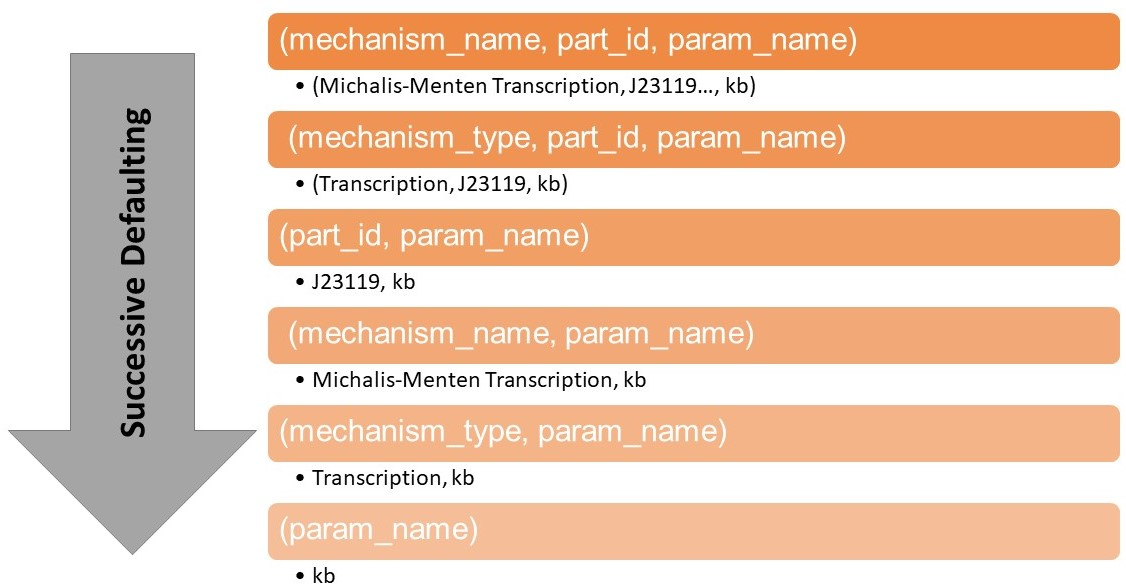

In [2]:
#Parameters Estimated from Cell Biology by the Numbers http://book.bionumbers.org/
f = open("parameters.txt")
print(f.read())

mechanism_id	part_id	param_name	param_val	comments
	e coli	Ribo	120	uM assuming ~72000 Ribosomes / e. coli with a volume 1 um^3
	e coli	RNAP	15	uM assuming ~10000 RNAP molecules / e. coli with a volume 1 um^3
	e coli	RNAase	30	uM assuming ~20000 RNAP molecules / e. coli with a volume 1 um^4
	e coli extract 1	Ribo	24	1/5 th the Ribosome concentration of E. Coli
	e coli extract 1	RNAP	3	1/5 th the rnap concentration of E. Coli
	e coli extract 1	RNAase	6	1/5 th the rnaase concentration of E. Coli
	e coli extract 2	Ribo	12	
	e coli extract 2	RNAP	6	
	e coli extract 2	RNAase	3	
		ktx	0.05	transcripts / second per polymerase assuming 50nt/s and transcript length of 1000
		ktl	0.05	proteins / second per ribosome assuming 15aa/s and protein length of 300
		cooperativity	2	Seems like a good default
		kb	100	assuming 10ms to diffuse across 1um (characteristic cell size)
		ku	10	"""90% binding"""
		kdil	0.001	assuming half life of ~20 minutes for everything (e coli doubling time)
rna_degredation_

In [3]:
from biocrnpyler import *
import numpy as np

#DNA_Assemblies are a core Component consisting of a promoter, and RBS
#The transcript and protein will be named automatically or can be named manually with those keywords
const_gfp = DNAassembly(name = "GFP", promoter = "P", rbs = "RBS")

#Expression Extract is a Mixture with very simple internal models
Model_expression = ExpressionExtract(name = "extract", components = [const_gfp], parameter_file = "parameters.txt")

print("BioCRNpyler Representation:\n", repr(Model_expression))

#BioCRNpyler Models are Compiled into a CRN
CRN_expression = Model_expression.compile_crn()
print("\nCRN Representation:\n", repr(CRN_expression))

#Save as SBML
CRN_expression.write_sbml_file("CRN_expression.sbml")

#Simulate with Bioscrape
timepoints = np.linspace(0, 200, 1000)
x0 = {"dna_GFP":1.0}
Rexpress, mexpress = CRN_expression.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0, file = "CRN_expression.sbml")


BioCRNpyler Representation:
 ExpressionExtract: extract
Components = [
	DNAassembly: GFP ]
Mechanisms = {
	transcription:gene_expression
	translation:dummy_translation }
Global Mechanisms = { }

CRN Representation:
 Species = dna_GFP, protein_GFP
Reactions = [
	dna_GFP --> dna_GFP + protein_GFP        massaction: k_f(dna_GFP)=0.28125*dna_GFP
]


/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bi

In [4]:
#Make a 
const_gfp = DNAassembly(name = "GFP", promoter = "P", rbs = "RBS") 

#TxTl Extract is a Mixture with more complex internal models # make sure you have one instance per mixture
extract_1_TXTL = TxTlExtract(name = "e coli extract 1", components = [const_gfp], parameters_file = "parameters.txt")
print("BioCRNpyler Representation:\n", repr(extract_1_TXTL))

CRN_extract_1 = extract_1_TXTL.compile_crn()
print("\nCRN Representation:\n", repr(CRN_extract_1))

#Save as SBML
CRN_extract_1.write_sbml_file("CRN_extract_1.sbml")


#Changing the name can load different parameter values
extract_2_TXTL = TxTlExtract(name = "e coli extract 2", components = [const_gfp], parameters_file = "parameters.txt")
CRN_extract_2 = extract_2_TXTL.compile_crn()
CRN_extract_2.write_sbml_file("CRN_extract_2.sbml")

BioCRNpyler Representation:
 TxTlExtract: e coli extract 1
Components = [
	DNAassembly: GFP
	Protein: RNAP
	Protein: Ribo
	Protein: RNAase ]
Mechanisms = {
	transcription:transcription_mm
	translation:translation_mm
	rna_degredation:rna_degredation_mm }
Global Mechanisms = { }

CRN Representation:
 Species = rna_GFP, protein_GFP, complex_dna_GFP_protein_RNAP, protein_RNAP, complex_protein_Ribo_rna_GFP, dna_GFP, protein_RNAase, complex_protein_RNAase_rna_GFP, protein_Ribo
Reactions = [
	dna_GFP + protein_RNAP <--> complex_dna_GFP_protein_RNAP        massaction: k_f(dna_GFP,protein_RNAP)=100.0*dna_GFP*protein_RNAP k_r(complex_dna_GFP_protein_RNAP)=10.0*complex_dna_GFP_protein_RNAP
	complex_dna_GFP_protein_RNAP --> dna_GFP + rna_GFP + protein_RNAP        massaction: k_f(complex_dna_GFP_protein_RNAP)=0.05*complex_dna_GFP_protein_RNAP
	rna_GFP + protein_Ribo <--> complex_protein_Ribo_rna_GFP        massaction: k_f(rna_GFP,protein_Ribo)=100.0*rna_GFP*protein_Ribo k_r(complex_protein_Ribo_rna

True

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


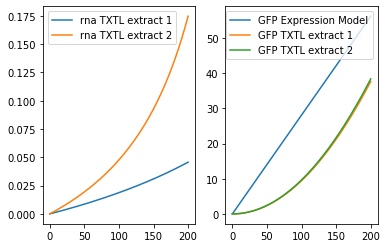

In [5]:
import pylab as plt
#Simulate with Bioscrape
timepoints = np.linspace(0, 200, 1000)
x0 = {"dna_GFP":1.0}
Re1, me1 = CRN_extract_1.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0, file = "CRN_extract_1.sbml")
Re2, me2 = CRN_extract_1.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0, file = "CRN_extract_2.sbml")

plt.subplot(121)
plt.plot(timepoints, Re1["rna_GFP"], label = "rna TXTL extract 1")
plt.plot(timepoints, Re2["rna_GFP"], label = "rna TXTL extract 2")
plt.legend()

plt.subplot(122)
plt.plot(timepoints, Rexpress["protein_GFP"], label = "GFP Expression Model")
plt.plot(timepoints, Re1["protein_GFP"], label = "GFP TXTL extract 1")
plt.plot(timepoints, Re2["protein_GFP"], label = "GFP TXTL extract 2")

plt.legend()

# How to Create a Mechanism
1. Create a New Subclass of Mechanism
2. fill in the \_\_init\_\_ function
3. Fill in the add_species function
4. Fill in the add_reactions function

Example:
\begin{align}
\textrm{Desired Reaction:    }&G \rightarrow G + T \quad \quad \rho(G, R) = \frac{k G }{K^n + R^n} \\
\textrm{Leak Reaction:    }&G \rightarrow G + T \quad \quad \rho(G) = k_{leak}
\end{align}

In [6]:
from biocrnpyler import Mechanism

#Create the new Subclass
class NegativeHillTranscription(Mechanism):
    #Set the name and mechanism_type
    def __init__(self, name="negativehill_transcription", mechanism_type="transcription"):
        Mechanism.__init__(self, name=name, mechanism_type=mechanism_type)
    
    #Overwrite update_species
    def update_species(self, dna, repressor, transcript = None, **keywords):
        
        if transcript == None: #Species names can be automatically created
            transcript = Species(dna.name, material = "rna")
            
        return [dna, transcript, repressor] #it is best to return all species that will be involved in the reactions
    
    #Overwrite update_reactions
    #This always requires the inputs component and part_id to find the relevant parameters
    def update_reactions(self, dna, repressor, component, part_id, transcript = None, **keywords):
        
        if transcript == None: #Species names should be automatically created the same here as above
            transcript = Species(dna.name, material = "rna")
        
        ktx = component.get_parameter("k", part_id = part_id, mechanism = self)
        n = component.get_parameter("n", part_id = part_id, mechanism = self)
        K = component.get_parameter("K", part_id = part_id, mechanism = self)
        kleak = component.get_parameter("kleak", part_id = part_id, mechanism = self)
        
        params = {"k":ktx, "n":n, "K":K, "s1":repressor, "d":dna}
        
        reaction = Reaction(inputs = [dna], outputs = [dna, transcript], 
                            propensity_type = "proportionalhillnegative", propensity_params = params)
        
        reaction_leak = Reaction(inputs = [dna], outputs = [dna, transcript], k = kleak)
        
        #In this case, we just return one reaction
        return [reaction, reaction_leak]
    

# How to Create a Component
1. Create a new Subclass of an existing Component (including Component)
2. fill in the \_\_init\_\_ function
3. fill in the add_species function with required mechanisms
4. fill in the add_reactions function with required mechanisms

Example:
A Repressible Promotor

In [7]:
from biocrnpyler import Promoter #Promotor is a subclass of component

class RepressablePromotor(Promoter):
    def __init__(self, name, transcript, repressor, **keywords):
        #Set the Regulator
        self.repressor = self.set_species(repressor)
        
        #Mechanisms are inherited from the Mixture unless set specifically in self.default_mechanisms.
        custom_mechanisms = {"transcription": NegativeHillTranscription()}
        
        #Always call the superclass __init__() with **keywords passed through
        Promoter.__init__(self, name = name, transcript = transcript, mechanisms = custom_mechanisms,**keywords)

    def update_species(self, **keywords):
        #Mechanisms are stored in an automatically created dictionary: mechanism_type --> Mechanism Instance.
        mech_tx = self.mechanisms["transcription"]
        
        species = [] #A list of species must be returned
        species += mech_tx.update_species(dna = self.assembly.dna, transcript = self.transcript, repressor = self.repressor)
        
        return species

    def update_reactions(self, **keywords):
        mech_tx = self.mechanisms["transcription"]
        
        reactions = [] #a list of reactions must be returned
        reactions = mech_tx.update_reactions(dna = self.assembly.dna, transcript = self.transcript, repressor = self.repressor, 
                                             component = self, part_id = "RepressedPromoter_"+self.repressor.name, **keywords)
        return reactions

# How to Create a Mixture
1. Create a new subclass of an existing Mixture (including Mixture)
2. fill in the \_\_init\_\_ function with default mechanisms and components

Example: A mixture with Transcription and Translation which dilutes/degrades proteins and RNA but RNA faster than proteins. 

In [8]:
from biocrnpyler.mechanism import SimpleTranscription, Translation_MM, SimpleTranslation
from biocrnpyler.global_mechanism import Dilution
from biocrnpyler.component import Protein

#A Model for Gene Expression without any Machinery (eg Ribosomes, Polymerases, etc.)
class DilutionMixture(Mixture):
    def __init__(self, name="", **keywords):
        
        simple_transcription = SimpleTranscription() #Transcription will not involve machinery
        simple_translation = SimpleTranslation()
        
        default_mechanisms = {
            "transcription": simple_transcription, #This will be overwritten by the NegativeHillPromotor
            "translation": simple_translation
        }
    
        #By Default Species are diluted S-->0 Unless:
        # They are of type 'dna'
        # They have the attribute 'machinery'
        dilution_mechanism = Dilution(filter_dict = {"dna":False}, default_on = True)
        dilution_mrn = Dilution(name = "rna_degredation", filter_dict = {"rna":True}, default_on = False)

        #Add this mechanism to a dictionary which is passed into the Mixture txtl.TxTlExtract
        global_mechanisms = {"dilution":dilution_mechanism, "rna_degredation":dilution_mrn}
        
        #Always call the superclass __init__ with **keywords
        Mixture.__init__(self, name=name, default_mechanisms=default_mechanisms, global_mechanisms = global_mechanisms, **keywords)

Species = protein_LacI, dna_lacI_rfp, protein_RFP, rna_lacI_rfp, dna_pConst, rna_pConst
Reactions = [
	dna_lacI_rfp --> dna_lacI_rfp + rna_lacI_rfp        proportionalhillnegative: k(protein_LacI, dna_lacI_rfp)=0.01875*dna_lacI_rfp/(10.0+protein_LacI^2.0)
	dna_lacI_rfp --> dna_lacI_rfp + rna_lacI_rfp        massaction: k_f(dna_lacI_rfp)=1e-06*dna_lacI_rfp
	rna_lacI_rfp --> rna_lacI_rfp + protein_RFP        massaction: k_f(rna_lacI_rfp)=0.15*rna_lacI_rfp
	dna_pConst --> dna_pConst + rna_pConst        massaction: k_f(dna_pConst)=0.1875*dna_pConst
	rna_pConst --> rna_pConst + protein_LacI        massaction: k_f(rna_pConst)=0.15*rna_pConst
	protein_LacI -->         massaction: k_f(protein_LacI)=0.001*protein_LacI
	protein_RFP -->         massaction: k_f(protein_RFP)=0.001*protein_RFP
	rna_lacI_rfp -->         massaction: k_f(rna_lacI_rfp)=0.001*rna_lacI_rfp
	rna_pConst -->         massaction: k_f(rna_pConst)=0.001*rna_pConst
	rna_lacI_rfp -->         massaction: k_f(rna_lacI_rfp)=0.002*rna

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


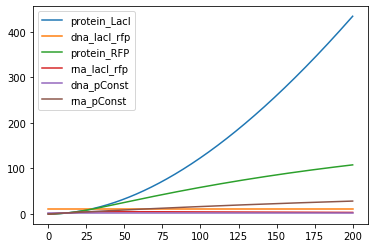

In [9]:
# Adding it all together

const_lacI = DNAassembly(name = "pConst", promoter = "P", rbs = "BCD8", protein = "LacI")

LacI = Species("LacI", material_type = "protein")
pLac = RepressablePromotor("pLac", transcript = "TRFP", repressor = LacI)
placI_rfp = DNAassembly(name = "lacI_rfp", promoter = pLac, rbs = "BCD8", protein = "RFP")

#DM = DilutionMixture(name = "DilutionMixture", components = [placI_rfp, const_lacI], parameters = parameters)
DM = DilutionMixture(name = "e coli", components = [placI_rfp, const_lacI], parameter_file = "parameters.txt")
repr(DM)

CRN = DM.compile_crn()

print(CRN)

timepoints = np.linspace(0, 200, 1000)
x0_dict = {repr(const_lacI.get_species()): 1, repr(placI_rfp.get_species()): 10}
R, m = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0_dict, stochastic = False, file = None)

import pylab as plt
for k in R:
    if k != 'time':
        plt.plot(timepoints, R[k], label = k)
plt.legend()

In [10]:
# Adding it all together into a bistable toggle
parameters = {("negativehill_transcription", "kleak"):.0001} #Parameters in the parameter file can be overwritten by passing in a parameter dictionary

LacI = Species("lacI", material_type = "protein")
tetR = Species("tetR", material_type = "protein")

pLac = RepressablePromotor("pLac", transcript = "tetR", repressor = LacI, parameters = parameters)
pTEt = RepressablePromotor("pTet", transcript = "lacI", repressor = tetR, parameters = parameters)

placI_tetR = DNAassembly(name = "lacI_tetR", promoter = pLac, rbs = "BCD8", protein = tetR)
ptetR_lacI = DNAassembly(name = "tetR_lacI", promoter = pTEt, rbs = "BCD8", protein = LacI)

ToggleSwitch = DilutionMixture(name = "e coli", components = [placI_tetR, ptetR_lacI], parameter_file = "parameters.txt")
ToggleCRN = ToggleSwitch.compile_crn()
ToggleCRN.write_sbml_file("ToggleCRN.sbml")

print(repr(ToggleCRN))




Species = protein_lacI, protein_tetR, dna_lacI_tetR, rna_lacI_tetR, rna_tetR_lacI, dna_tetR_lacI
Reactions = [
	dna_lacI_tetR --> dna_lacI_tetR + rna_lacI_tetR        proportionalhillnegative: k(protein_lacI, dna_lacI_tetR)=0.01875*dna_lacI_tetR/(10.0+protein_lacI^2.0)
	dna_lacI_tetR --> dna_lacI_tetR + rna_lacI_tetR        massaction: k_f(dna_lacI_tetR)=0.0001*dna_lacI_tetR
	rna_lacI_tetR --> rna_lacI_tetR + protein_tetR        massaction: k_f(rna_lacI_tetR)=0.15*rna_lacI_tetR
	dna_tetR_lacI --> dna_tetR_lacI + rna_tetR_lacI        proportionalhillnegative: k(protein_tetR, dna_tetR_lacI)=0.01875*dna_tetR_lacI/(10.0+protein_tetR^2.0)
	dna_tetR_lacI --> dna_tetR_lacI + rna_tetR_lacI        massaction: k_f(dna_tetR_lacI)=0.0001*dna_tetR_lacI
	rna_tetR_lacI --> rna_tetR_lacI + protein_lacI        massaction: k_f(rna_tetR_lacI)=0.15*rna_tetR_lacI
	protein_lacI -->         massaction: k_f(protein_lacI)=0.001*protein_lacI
	protein_tetR -->         massaction: k_f(protein_tetR)=0.001*protein_

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +
/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +
/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by biosc

Text(0.5, 1.0, 'Bistable Toggle Phase Space')

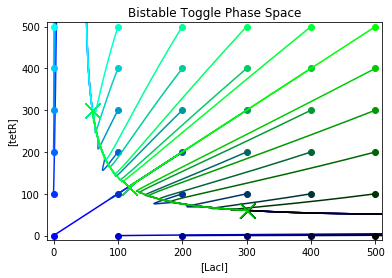

In [11]:
placI0 = 10.0
ptetR0 = 10.0
timepoints = np.linspace(0, 50000, 1000)
x0_dict = {repr(placI_tetR.get_species()):placI0, repr(ptetR_lacI.get_species()):ptetR0}
for tetR0 in np.arange(0, 501, 100):
    for lacI0 in np.arange(0, 501, 100):
        x0_dict[repr(LacI)] = lacI0
        x0_dict[repr(tetR)] = tetR0
        R, m = ToggleCRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0_dict, stochastic = False, file = "ToggleCRN.sbml")

        plt.plot(R["protein_lacI"], R["protein_tetR"], color = (0, tetR0/500, 1-lacI0/500))
        plt.plot(lacI0, tetR0, 'o', color = (0, tetR0/500, 1-lacI0/500))
        plt.plot(R["protein_lacI"][len(timepoints)-1], R["protein_tetR"][len(timepoints)-1], 'x', 
                 color = (0, tetR0/500, 1-lacI0/500), ms = 15)

plt.xlabel("[LacI]")
plt.ylabel("[tetR]")
plt.xlim(-10, 510)
plt.ylim(-10, 510)
plt.title("Bistable Toggle Phase Space")


Biocrnpyler Representation:
 DilutionMixture: e coli
Components = [
	DNAassembly: lacI_tetR
	DNAassembly: tetR_cl
	DNAassembly: cl_lacI ]
Mechanisms = {
	transcription:simple_transcription
	translation:simple_translation }
Global Mechanisms = {
	dilution:global_degredation_via_dilution
	rna_degredation:rna_degredation }
CRN Representation:
 Species = protein_lacI, protein_tetR, dna_lacI_tetR, rna_lacI_tetR, dna_tetR_cl, rna_tetR_cl, protein_cl, dna_cl_lacI, rna_cl_lacI
Reactions = [
	dna_lacI_tetR --> dna_lacI_tetR + rna_lacI_tetR        proportionalhillnegative: k(protein_lacI, dna_lacI_tetR)=0.01875*dna_lacI_tetR/(10.0+protein_lacI^2.0)
	dna_lacI_tetR --> dna_lacI_tetR + rna_lacI_tetR        massaction: k_f(dna_lacI_tetR)=1e-06*dna_lacI_tetR
	rna_lacI_tetR --> rna_lacI_tetR + protein_tetR        massaction: k_f(rna_lacI_tetR)=0.15*rna_lacI_tetR
	dna_tetR_cl --> dna_tetR_cl + rna_tetR_cl        proportionalhillnegative: k(protein_tetR, dna_tetR_cl)=0.01875*dna_tetR_cl/(10.0+protein_te

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


Text(0.5, 0, 'Time')

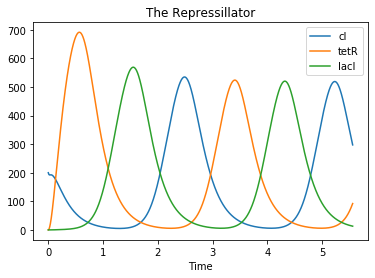

In [12]:
# Adding it all together into the repressilator toggle

lacI = Species("lacI", material_type = "protein")
tetR = Species("tetR", material_type = "protein")
cl = Species("cl", material_type = "protein")

pLac = RepressablePromotor("pLac", transcript = "tetR", repressor = lacI)
pTet = RepressablePromotor("pTet", transcript = "cl", repressor = tetR)
pCl = RepressablePromotor("pCl", transcript = "lacI", repressor = cl)

placI_tetR = DNAassembly(name = "lacI_tetR", promoter = pLac, rbs = "BCD8", protein = tetR)
ptetR_cl = DNAassembly(name = "tetR_cl", promoter = pTet, rbs = "BCD8", protein = cl)
pcl_lacI = DNAassembly(name = "cl_lacI", promoter = pCl, rbs = "BCD8", protein = lacI)

Repressillator = DilutionMixture(name = "e coli", components = [placI_tetR, ptetR_cl, pcl_lacI], parameter_file = "parameters.txt")
RepressillatorCRN = Repressillator.compile_crn()

print("Biocrnpyler Representation:\n", repr(Repressillator))

RepressillatorCRN.write_sbml_file("RepressillatorCRN.sbml")

print("CRN Representation:\n", repr(RepressillatorCRN))

x0_dict = {repr(placI_tetR.get_species()):1, repr(ptetR_cl.get_species()):1, repr(pcl_lacI.get_species()):1,
          repr(lacI):0, repr(tetR):0, repr(cl):200}

timepoints = np.linspace(0, 20000, 10000)
R, m = RepressillatorCRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0_dict, stochastic = False, file = "RepressillatorCRN.sbml")

plt.plot(R['time']/3600, R[repr(cl)], label = "cl")
plt.plot(R['time']/3600, R[repr(tetR)], label = "tetR")
plt.plot(R['time']/3600, R[repr(lacI)], label = "lacI")
plt.legend()
plt.title("The Repressillator")
plt.xlabel("Time")